In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   
#import knnClassify3CTrain-1.txt

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from scipy import stats
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
## Reads Data in
headerList = ['Fixed Acidity','Volatile Acidity','Citric Acid','Residual Sugar','Chlorides','Free Sulfur Dioxide','Total Sulfur Dioxide','Density','pH','Sulphates','Alcohol','Quality']
redWineData = pd.read_excel('winequality-red.xlsx',header = 0, names = headerList)

x_train, x_test, y_train, y_test = train_test_split(redWineData.loc[:,'Fixed Acidity': 'Alcohol'], redWineData.loc[:,'Quality'], test_size=0.30)




#Summarative functions
#redWine.dtypes
#redWine.describe()
#redWine.info()


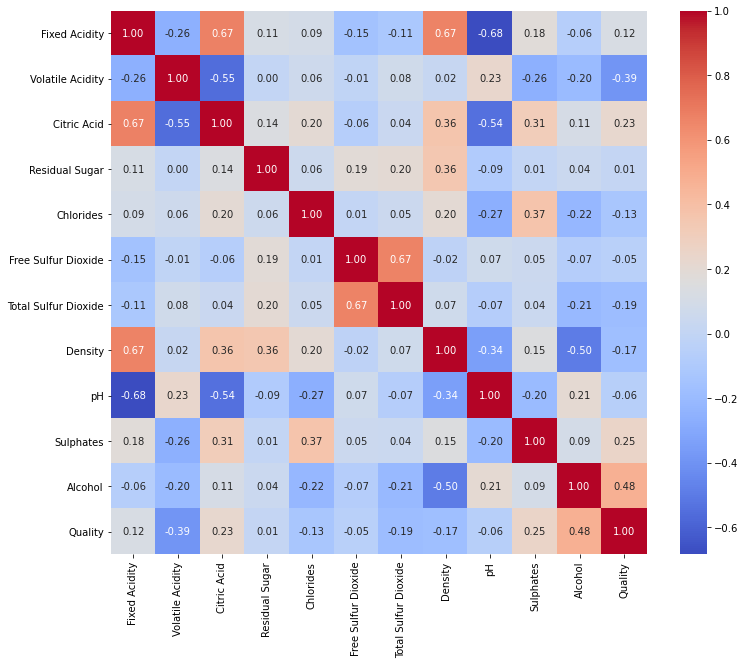

In [4]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(redWineData.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

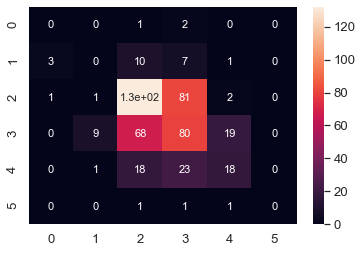

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.57      0.61      0.59       217
           6       0.41      0.45      0.43       176
           7       0.44      0.30      0.36        60
           8       0.00      0.00      0.00         3

    accuracy                           0.48       480
   macro avg       0.24      0.23      0.23       480
weighted avg       0.47      0.48      0.47       480



C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
###################################################################################################3
## KNN Method for the data set. Found that it is terrible without data cleaing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train.ravel())

y_pred_KNN = knn.predict(x_test)

confusion_matrix = confusion_matrix(y_test,y_pred_KNN)
redWineData_cm = pd.DataFrame(confusion_matrix)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm, annot=True, annot_kws={"size": 11}) # font size
plt.show()

#Print classification report
clas = classification_report(y_test, y_pred_KNN)
print(clas)


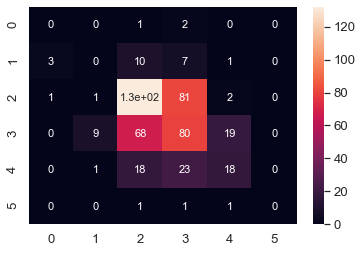

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.45      1.00      0.62       217
           6       0.00      0.00      0.00       176
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         3

    accuracy                           0.45       480
   macro avg       0.08      0.17      0.10       480
weighted avg       0.20      0.45      0.28       480



C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#############################################################################################################
## ANN method for the data set. About the same accuracy as KNN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier(activation = 'logistic', solver = 'adam', hidden_layer_sizes = (4,10), 
                       alpha=1e-2, max_iter = 400, learning_rate_init = 0.1)
                        ## Solves using stochastic gradient descent, has i hidden layers, learning rate of 0.1
                        ## alpha is L2 penalty valye
## Fits model to data
MLP.fit(x_train,y_train.ravel())

y_pred_ANN = MLP.predict(x_test)

confusion_matrix = confusion_matrix(y_test,y_pred_KNN)
redWineData_cm = pd.DataFrame(confusion_matrix)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm, annot=True, annot_kws={"size": 11}) # font size
plt.show()

#Print classification report
clas = classification_report(y_test, y_pred_ANN)
print(clas)

## Calc the score of how well the model did and adds it to a list
#score_train = MLP.score(x_train,y_train)
#score_test = MLP.score(x_test,y_test)